In [11]:
from script.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification import verification
import torch
import torchvision as tv
from script.Normalisation import normalize_nn, get_std, get_mean, normalize_data
import matplotlib

In [12]:
epochs = 3
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 0.1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

non_normalized_icnn = ICNN([2, 10, 10, 1])
normalized_icnn = ICNN([2, 10, 10, 1])

#matplotlib.use("TkAgg")

In [13]:
"""
norm_included_space, norm_ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range)  #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
std = torch.tensor([0.001,0.001], dtype=torch.float64)
mean = torch.tensor([1,2], dtype=torch.float64)

def norm(samples):
    new_tensor = torch.empty(samples.size(), dtype=torch.float64)
    for i in range(len(new_tensor)):
        new_tensor[i] = samples[i] * std + mean
    return new_tensor

print(norm_included_space[0])
un_norm_included_space = tv.transforms.Lambda(lambda samples: norm(samples))(norm_included_space).detach().requires_grad_(True)
un_norm_ambient_space = tv.transforms.Lambda(lambda samples: norm(samples))(norm_ambient_space).detach().requires_grad_(True)
print(un_norm_included_space[0])"""


true_extremal_points = [[0,0]]
un_norm_ambient_space = torch.load("../../ambient_space_after_relu.pt", weights_only=True)
un_norm_included_space = torch.load("../../included_space_after_relu.pt", weights_only=True)

mean = get_mean(un_norm_included_space, un_norm_ambient_space)
std = get_std(un_norm_included_space, un_norm_ambient_space)

norm_included_space, norm_ambient_space = normalize_data(un_norm_included_space, un_norm_ambient_space, mean, std)

In [14]:
norm_dataset = ConvexDataset(data=norm_included_space)
norm_train_loader = DataLoader(norm_dataset, batch_size=batch_size, shuffle=True)
norm_dataset = ConvexDataset(data=norm_ambient_space)
norm_ambient_loader = DataLoader(norm_dataset, batch_size=batch_size, shuffle=True)

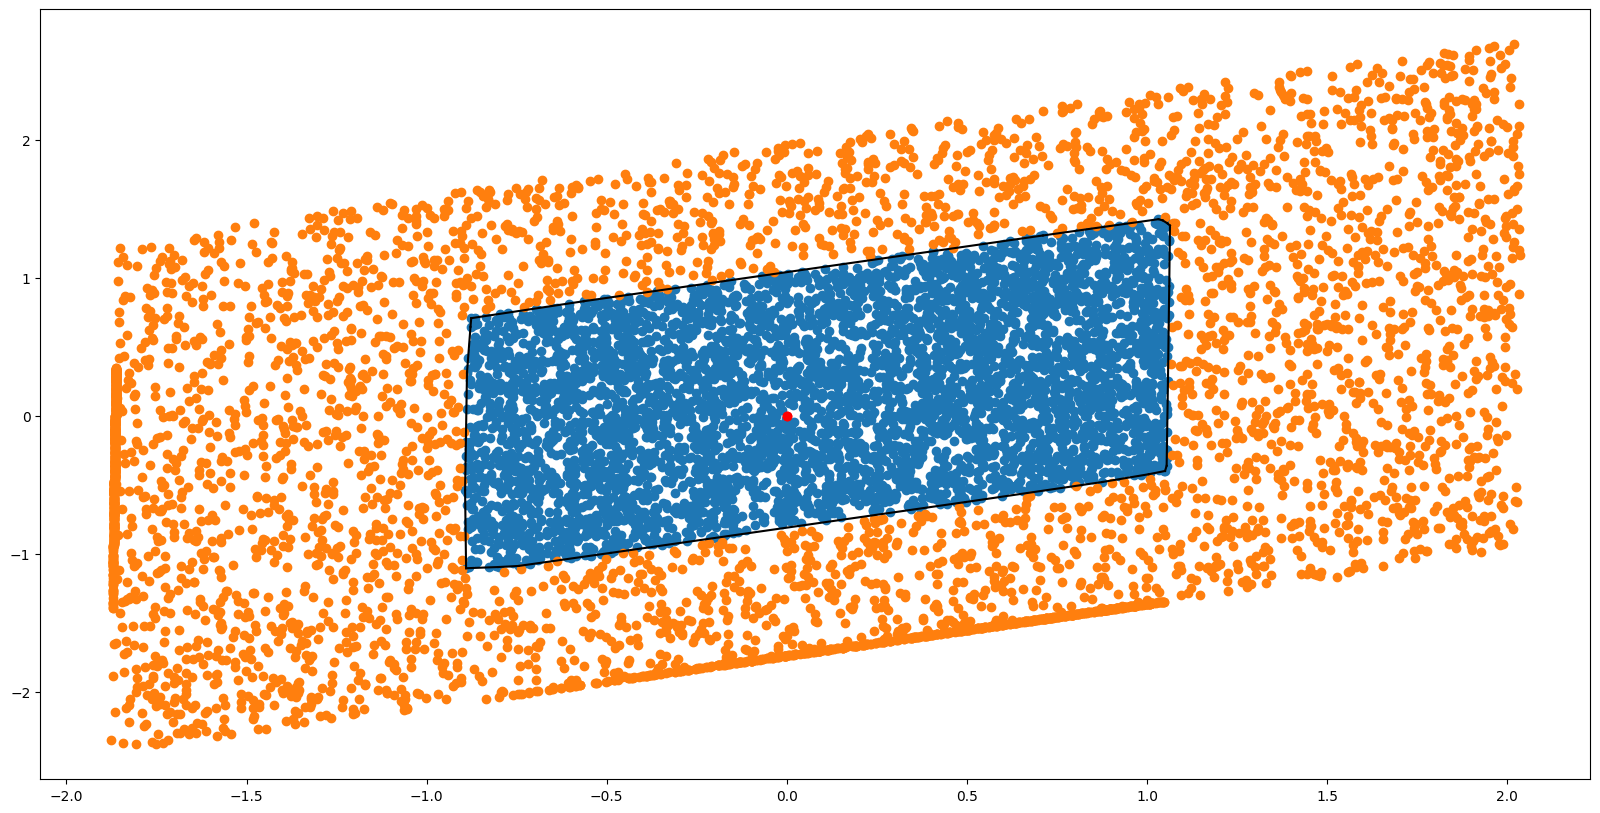

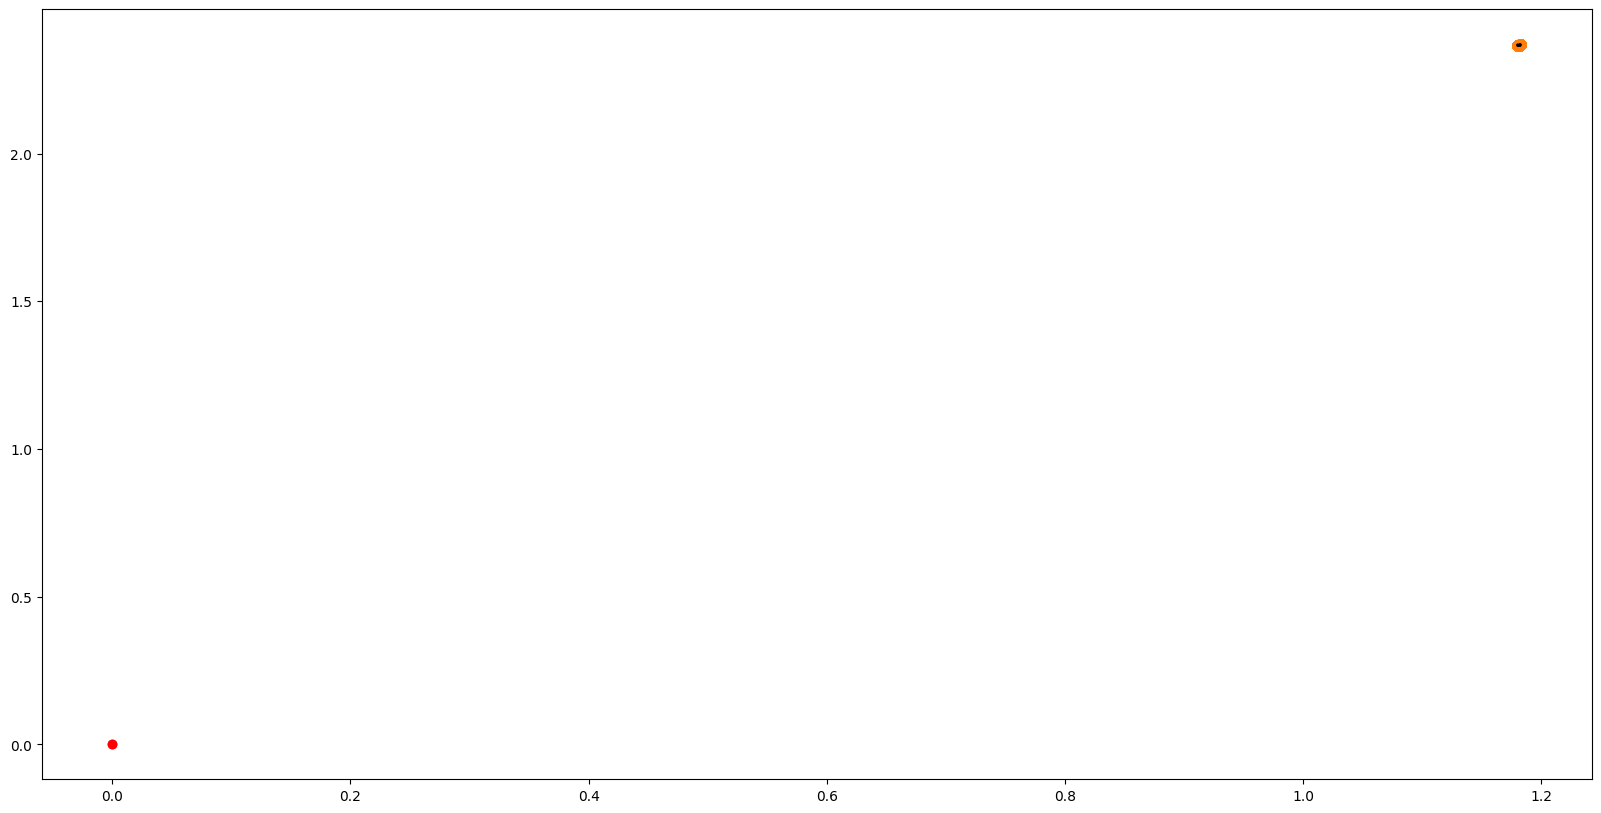

In [15]:
norm_plots = Plots_for(0, non_normalized_icnn, norm_included_space.detach(), norm_ambient_space.detach(), true_extremal_points, x_range, y_range)
norm_plots.plt_initial()

un_norm_plots = Plots_for(0, normalized_icnn, un_norm_included_space.detach(), un_norm_ambient_space.detach(), true_extremal_points, [1.1792,1.1831], [2.3644, 2.3698]) #
un_norm_plots.plt_initial()

In [16]:
history = train_icnn(non_normalized_icnn, norm_train_loader,norm_ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 0.7941767563819633
batch = 100, mean loss = 0.7737190718772144
batch = 200, mean loss = 0.7447523217081701
batch = 300, mean loss = 0.7185085361746067
batch = 400, mean loss = 0.6952238366389725
batch = 500, mean loss = 0.6770310318146531
batch = 600, mean loss = 0.6590519140348782
batch = 700, mean loss = 0.6441800078378173
batch = 800, mean loss = 0.6285235877854427
batch = 900, mean loss = 0.6135550993565403
batch = 1000, mean loss = 0.5991241603372733
batch = 1100, mean loss = 0.5863853729134298
batch = 1200, mean loss = 0.5743839811580042
batch = 1300, mean loss = 0.5626339573786274
batch = 1400, mean loss = 0.5515172057532682
batch = 1500, mean loss = 0.5409743583932655
batch = 1600, mean loss = 0.530534528737518
batch = 1700, mean loss = 0.5199034341836047
batch = 1800, mean loss = 0.5094832277742439
batch = 1900, mean loss = 0.49959325970325663
batch = 2000, mean loss = 0.48963055089493973
batch = 2100, mean loss = 0.47998144241033397
batc

In [17]:
normalized_icnn.load_state_dict(non_normalized_icnn.state_dict())
normalize_nn(normalized_icnn, mean, std, isICNN=True)


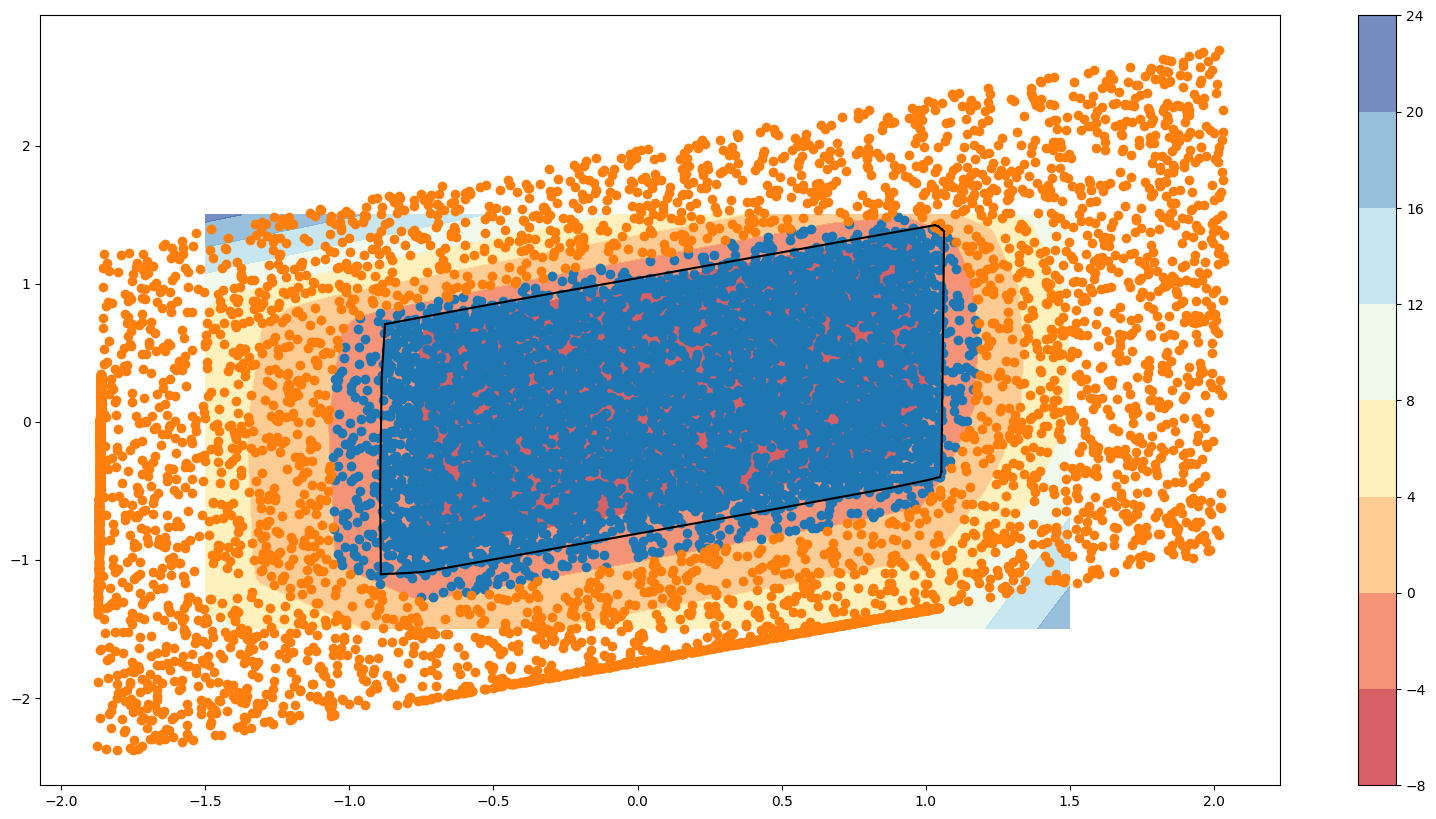

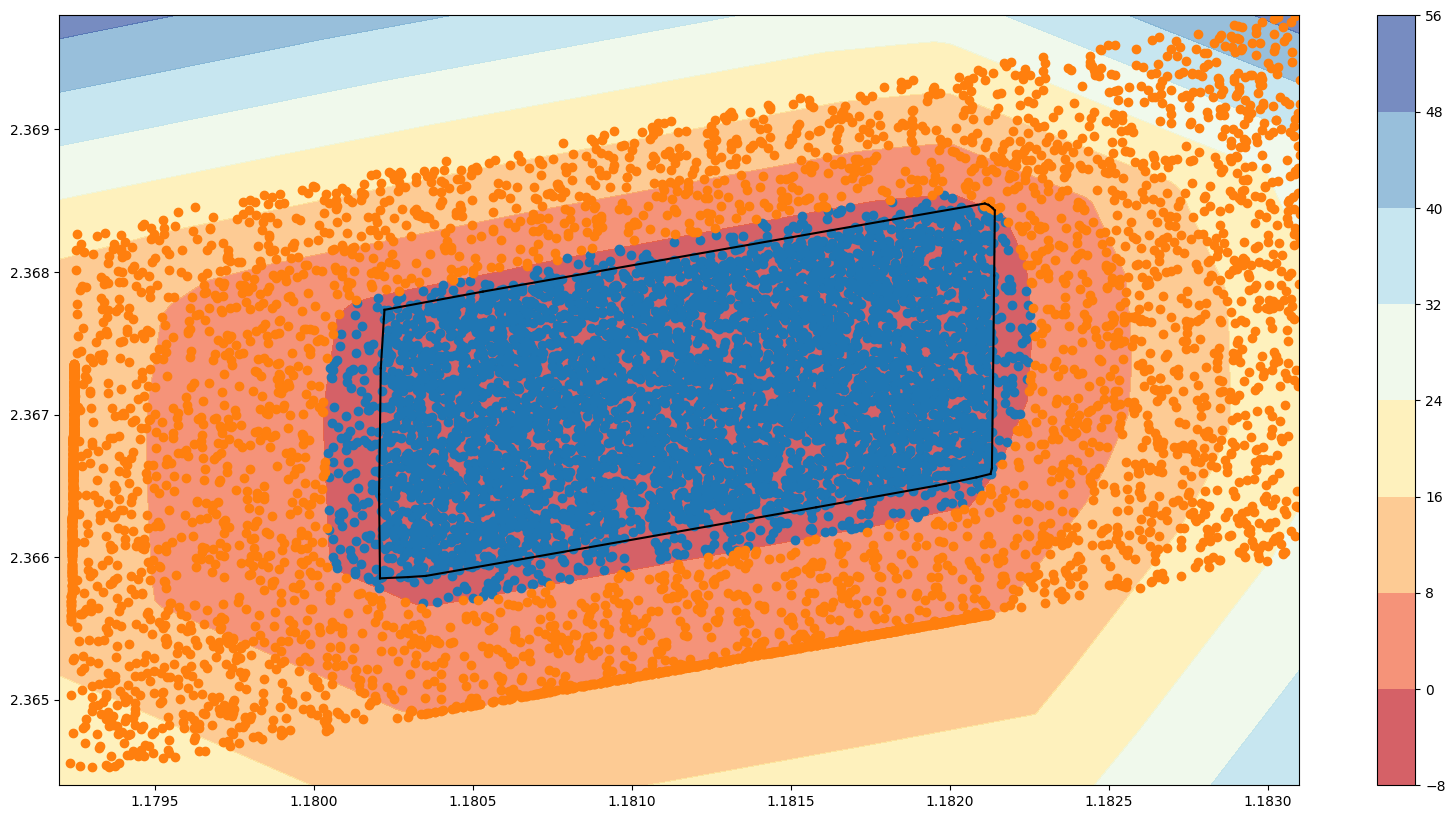

In [18]:
norm_plots.plt_mesh()
un_norm_plots.plt_mesh()

In [19]:
import numpy as np
center = [1.18125, 2.367]
eps = 0.002
print("max: {}, {}".format(center[0]-eps, center[0]+eps))
print("min: {}, {}".format(center[1]-eps, center[1]+eps))
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(normalized_icnn, center=center, eps=eps)

max: 1.17925, 1.18325
min: 2.365, 2.3689999999999998
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 140 rows, 100 columns and 393 nonzeros
Model fingerprint: 0xa89191e9
Model has 2 general constraints
Variable types: 80 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [2e-05, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+05]
  RHS range        [6e-04, 1e+05]
  GenCon const rng [1e+00, 2e+00]
Presolve removed 76 rows and 52 columns
Presolve time: 0.02s
Presolved: 64 rows, 48 columns, 254 nonzeros
Variable types: 30 continuous, 18 integer (18 binary)
Found heuristic solution: objective -4.9509383

Root relaxation: objective 6.713263e+01, 35 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds    

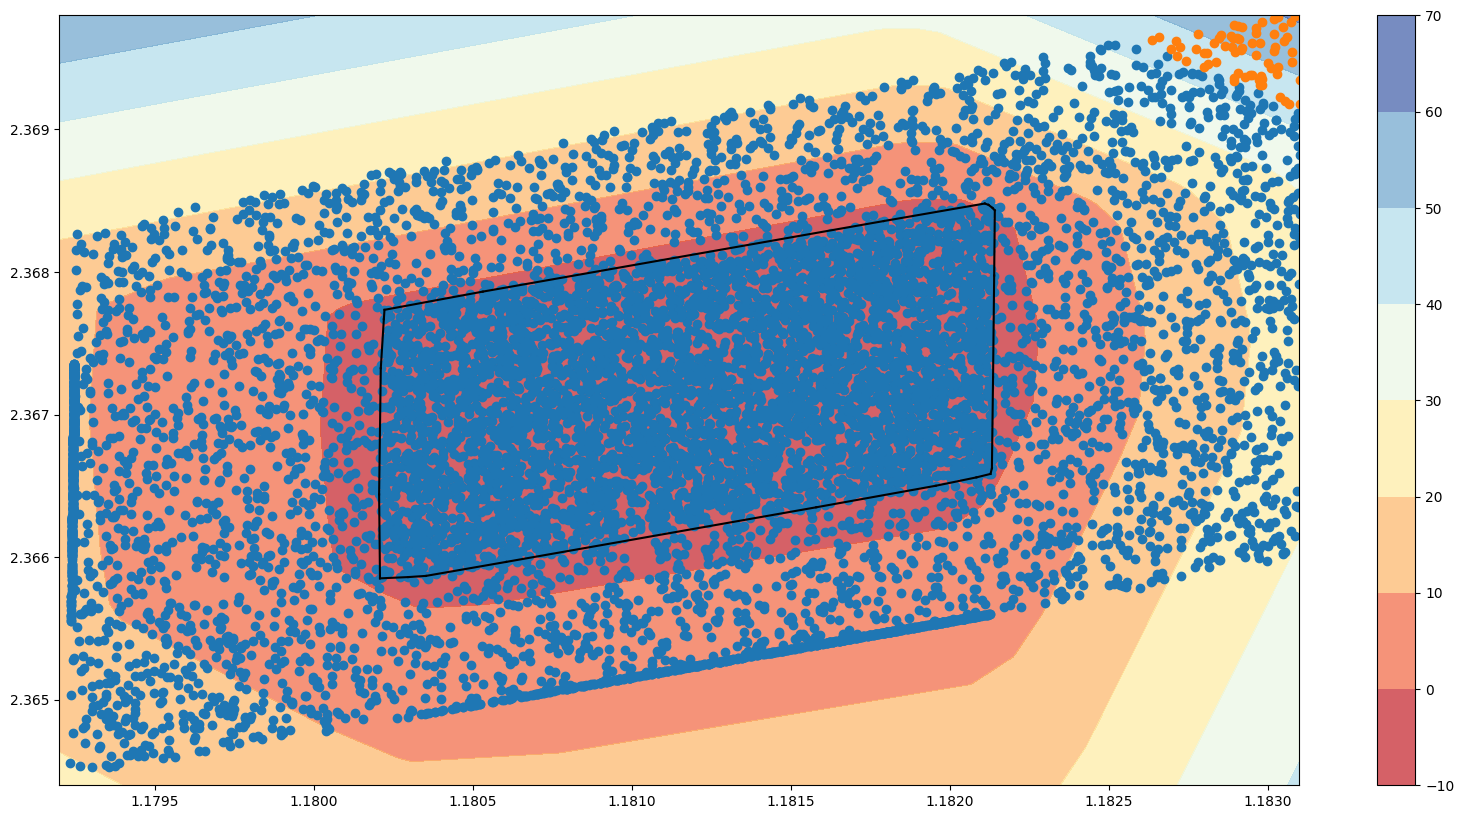

In [10]:
input_data, un_norm_plots.c = result
un_norm_plots.plt_mesh()